In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Datasets/mall.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Implement different types of distance measures used in clustering algorithms

In [3]:
# Define distance functions
def euclidean_distance(x, y):
    return np.sqrt(np.sum((x - y)**2))

def manhattan_distance(x, y):
    return np.sum(np.abs(x - y))

def minkowski_distance(x, y, p):
    return np.sum(np.abs(x - y)**p) ** (1 / p)

def chebyshev_distance(x, y):
    return np.max(np.abs(x - y))

def cosine_distance(x, y):
    # cosine similarity, then distance = 1 - similarity
    cosine_sim = np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))
    return 1 - cosine_sim

# Select two sample data points using numeric features (excluding CustomerID and Genre)
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
x = data.loc[0, features].values
y = data.loc[1, features].values

print("Euclidean Distance:", euclidean_distance(x, y))
print("Manhattan Distance:", manhattan_distance(x, y))
print("Minkowski Distance (p=3):", minkowski_distance(x, y, 3))
print("Chebyshev Distance:", chebyshev_distance(x, y))
print("Cosine Distance:", cosine_distance(x, y))

Euclidean Distance: 42.04759208325728
Manhattan Distance: 44
Minkowski Distance (p=3): 42.001511661389145
Chebyshev Distance: 42
Cosine Distance: 0.030550823358802215


Euclidean Distance: 42.04759208325728
Manhattan Distance: 44
Minkowski (p=3) Distance: 42.001511661389145
Chebyshev Distance: 42
Cosine Distance: 0.030550823358802215


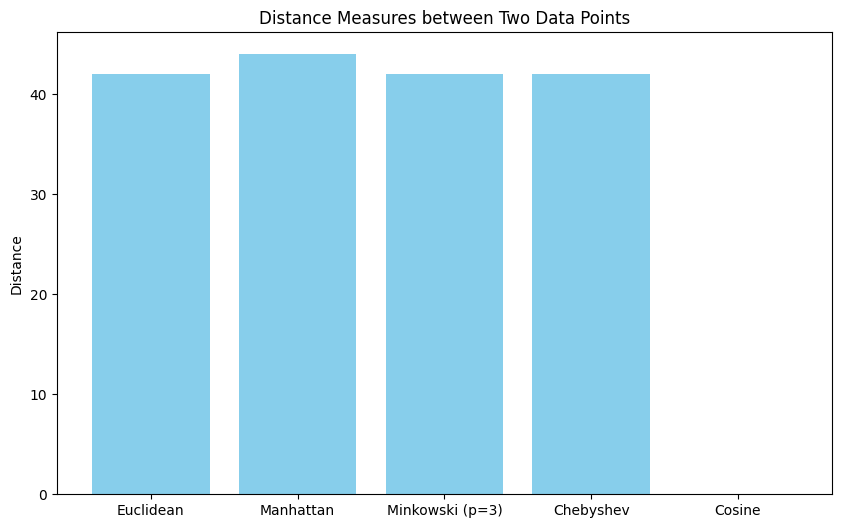

In [4]:
# Compute all distances and store in a dictionary
distances = {
    "Euclidean": euclidean_distance(x, y),
    "Manhattan": manhattan_distance(x, y),
    "Minkowski (p=3)": minkowski_distance(x, y, 3),
    "Chebyshev": chebyshev_distance(x, y),
    "Cosine": cosine_distance(x, y)
}

# Print the distance values
for name, value in distances.items():
    print(f"{name} Distance: {value}")

# Create a bar plot for the distances
plt.figure(figsize=(10, 6))
plt.bar(distances.keys(), distances.values(), color='skyblue')
plt.ylabel('Distance')
plt.title('Distance Measures between Two Data Points')
plt.show()


               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        46.213483           47.719101               41.797753
1        32.454545          108.181818               82.727273
2        24.689655           29.586207               73.655172
3        40.394737           87.000000               18.631579
4        31.787879           76.090909               77.757576


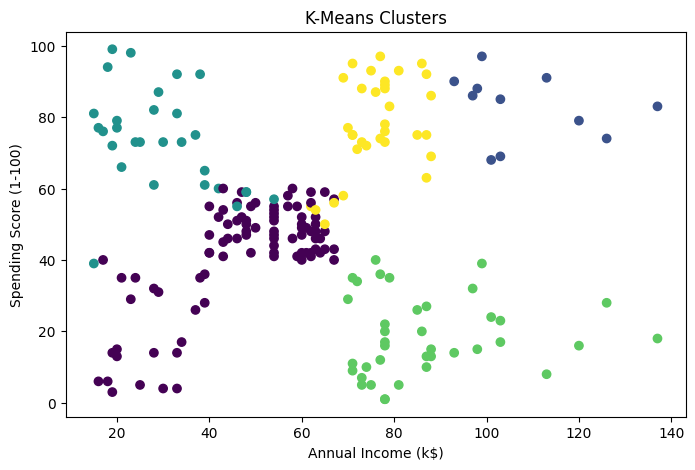

In [7]:
from sklearn.cluster import KMeans

# Select numeric features
X = data[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
data["Cluster"] = kmeans.fit_predict(X)

# Simple analysis: view mean values by cluster
# Restrict to numeric columns only
print(data.groupby("Cluster")[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean())

# Plot the clusters (example using Annual Income vs Spending Score)
plt.figure(figsize=(8,5))
plt.scatter(data["Annual Income (k$)"], data["Spending Score (1-100)"], c=data["Cluster"], cmap="viridis")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("K-Means Clusters")
plt.show()

               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        44.483871           59.879032               35.427419
1        32.975610           88.731707               79.243902
2        25.771429           29.971429               68.514286


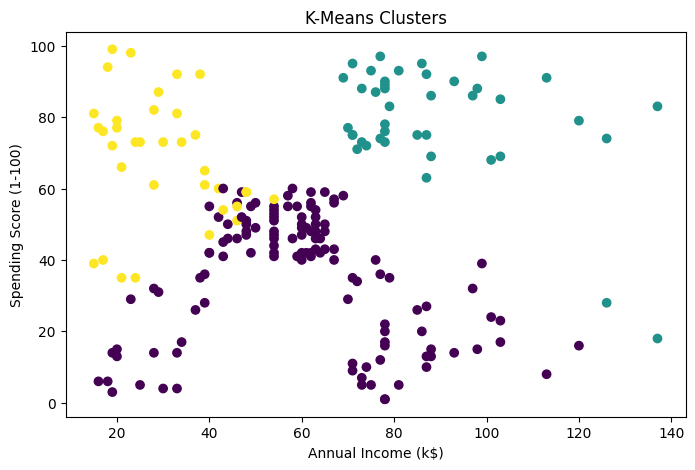

In [8]:
from sklearn.cluster import KMeans

# Select numeric features
X = data[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data["Cluster"] = kmeans.fit_predict(X)

# Simple analysis: view mean values by cluster
# Restrict to numeric columns only
print(data.groupby("Cluster")[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean())

# Plot the clusters (example using Annual Income vs Spending Score)
plt.figure(figsize=(8,5))
plt.scatter(data["Annual Income (k$)"], data["Spending Score (1-100)"], c=data["Cluster"], cmap="viridis")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("K-Means Clusters")
plt.show()

K-Means Silhouette Score: 0.335580238662684
Agglomerative Clustering Silhouette Score: 0.38141795042544546


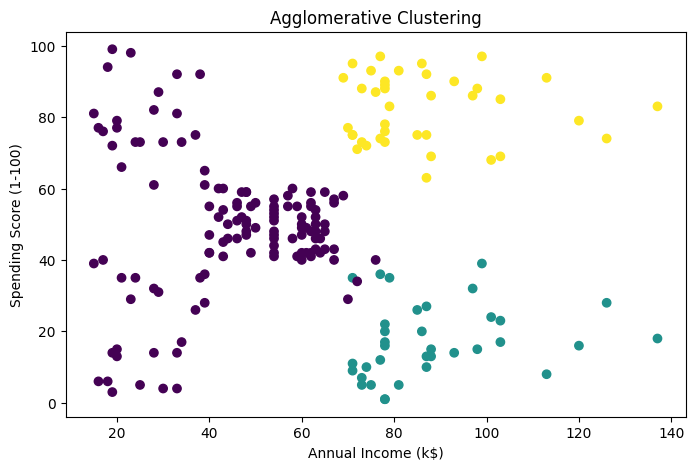

In [9]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
data["Agg_Cluster"] = agg_clustering.fit_predict(X)

# Compute silhouette scores for both clustering methods
kmeans_silhouette = silhouette_score(X, data["Cluster"])
agg_silhouette = silhouette_score(X, data["Agg_Cluster"])

print(f"K-Means Silhouette Score: {kmeans_silhouette}")
print(f"Agglomerative Clustering Silhouette Score: {agg_silhouette}")

# Plot the clusters for Agglomerative Clustering (example using Annual Income vs Spending Score)
plt.figure(figsize=(8,5))
plt.scatter(data["Annual Income (k$)"], data["Spending Score (1-100)"], c=data["Agg_Cluster"], cmap="viridis")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Agglomerative Clustering")
plt.show()

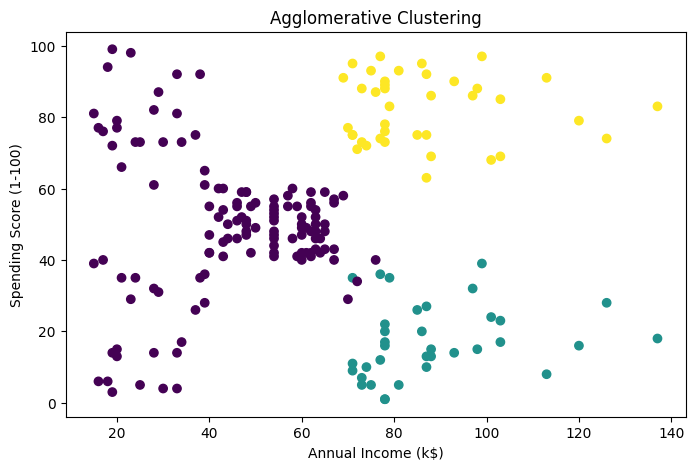

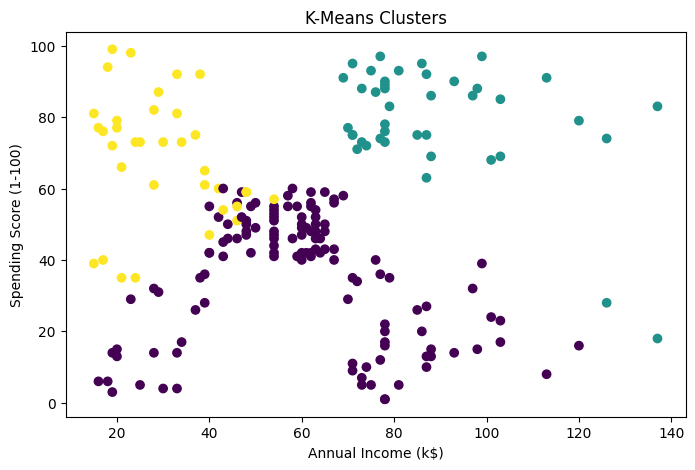

In [11]:
# Plot the clusters for Agglomerative Clustering (example using Annual Income vs Spending Score)
plt.figure(figsize=(8,5))
plt.scatter(data["Annual Income (k$)"], data["Spending Score (1-100)"], c=data["Agg_Cluster"], cmap="viridis")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Agglomerative Clustering")
plt.show()

# Plot the clusters (example using Annual Income vs Spending Score)
plt.figure(figsize=(8,5))
plt.scatter(data["Annual Income (k$)"], data["Spending Score (1-100)"], c=data["Cluster"], cmap="viridis")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("K-Means Clusters")
plt.show()